In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [11]:
N_list = [50]
n_list = [1, 2, 4, 8]

all_data = np.empty((len(N_list), len(n_list)), dtype=object)

for i, N in enumerate(N_list):
    for j, n in enumerate(n_list):
        data = f"doc/demo/output_data/performance_data_{N}x{N}_n_{n}"
        with open(data, "rb") as f:
            performance_data = pickle.load(f)
        all_data[i,j] = performance_data
            

In [ ]:
all_data[0,:]["total_time"]

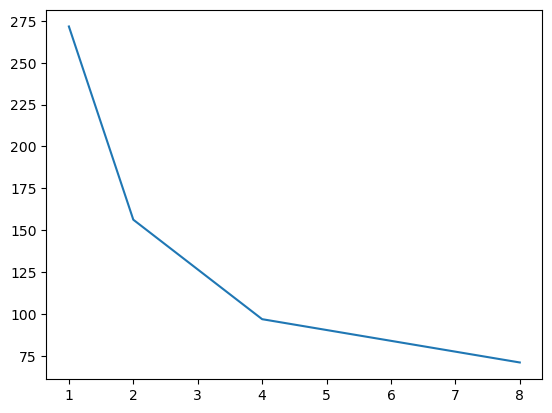

In [16]:
for j, n in enumerate(n_list):
    total_time = [all_data[0,j]["total_time"] for j in range(len(n_list))]
plt.plot(n_list, total_time, label=f"n={n}")

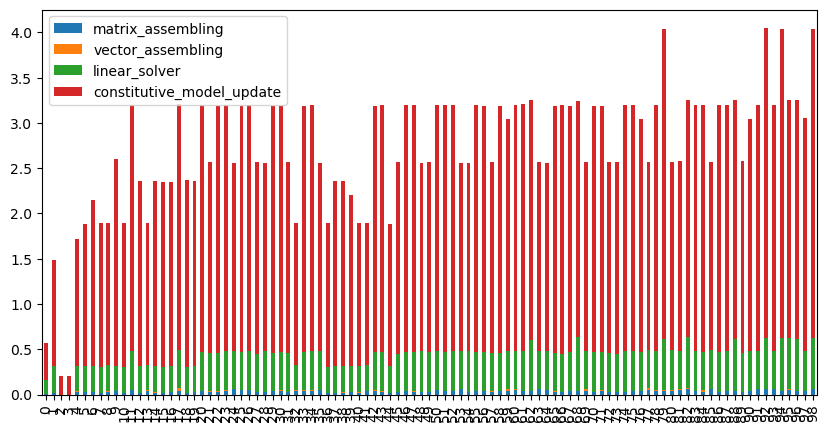

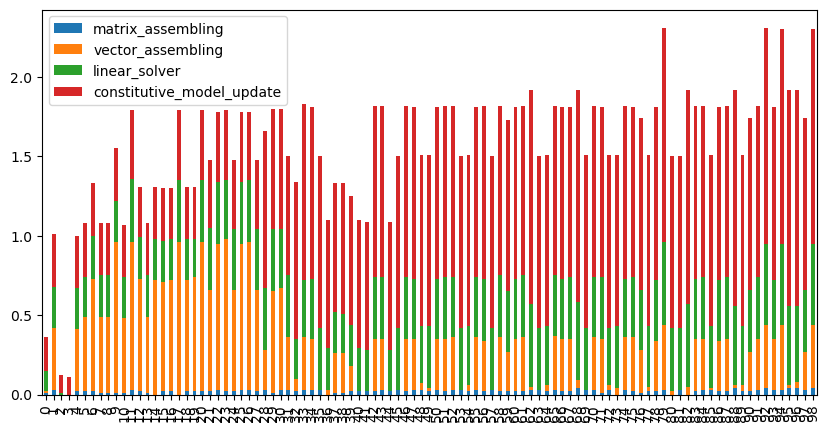

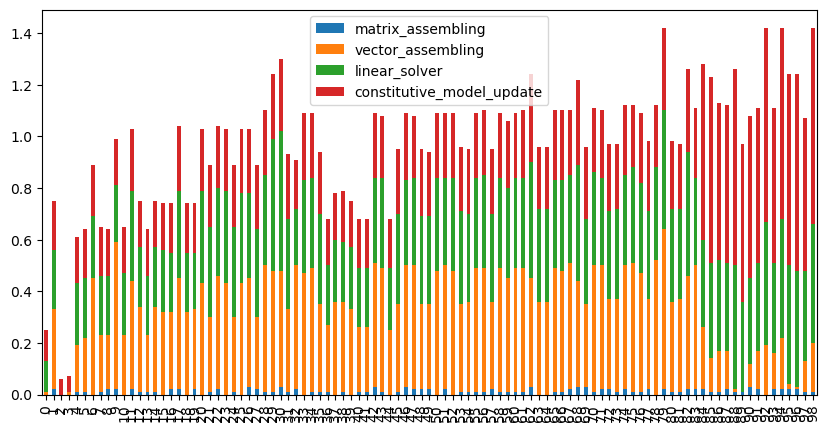

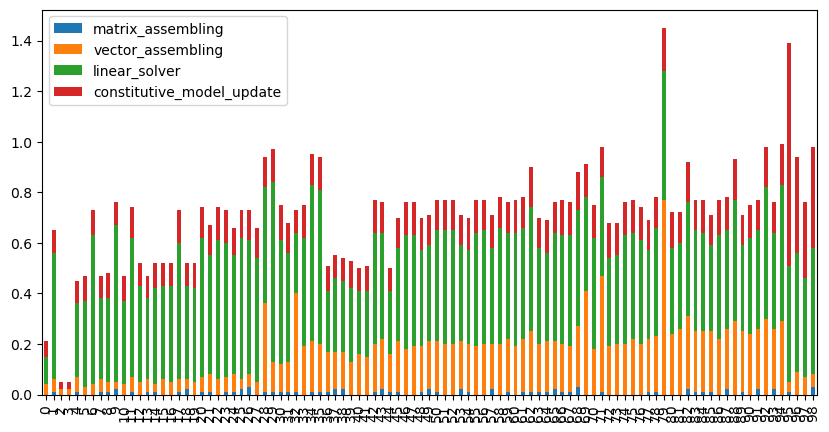

In [18]:
cols = ["matrix_assembling", "vector_assembling", "linear_solver", "constitutive_model_update"]
for j, n in enumerate(n_list):
    monitor = all_data[0,j]["performance_monitor"]
    monitor["linear_solver"] = monitor["nonlinear_solver"] - monitor["matrix_assembling"] - monitor["vector_assembling"] - monitor["constitutive_model_update"]
    fig, ax = plt.subplots(figsize=(10, 5))
    monitor.plot(use_index=True, y=cols, kind="bar", stacked=True, ax=ax)